### Import library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Sanity check

In [4]:
titanic.shape

(891, 15)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic.isna().sum()*100/len(titanic)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [8]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Nhận thấy ở đây cột age là một trong những cột thiếu dữ liệu và phải tìm cách điền vào.

## Xử lý thông tin Age bị thiếu.

### Data Distribution check

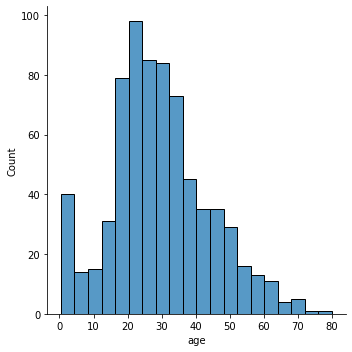

In [11]:
#Check Age distribution of 'age' columns
sns.displot(data=titanic, x ='age')
plt.show()

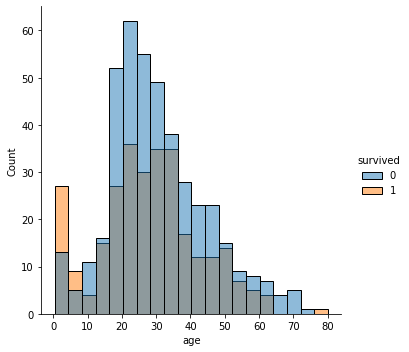

In [14]:
#check correlation between 'Age' and 'Survived'
sns.displot(data=titanic, x='age', hue='survived')
plt.show()

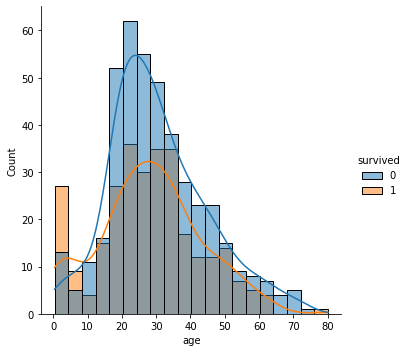

In [15]:
sns.displot(data=titanic, x='age', hue ='survived', kde = True)
plt.show()

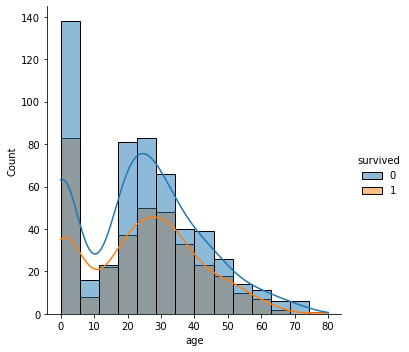

In [21]:
# if replate empty Age data by 0
sns.displot(data=titanic[['age','survived']].fillna(0), x='age', hue='survived', kde=True)
plt.show()

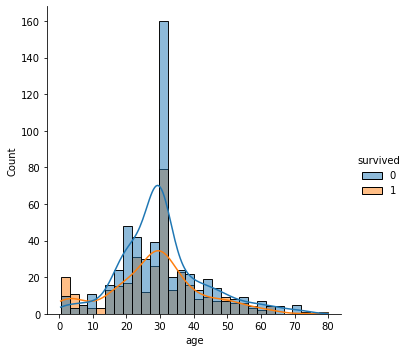

In [26]:
#Try with mean() value with emtpy age data
sns.displot(data=titanic[['age','survived']].fillna(titanic['age'].mean()), x='age', hue='survived', kde=True)
plt.show()

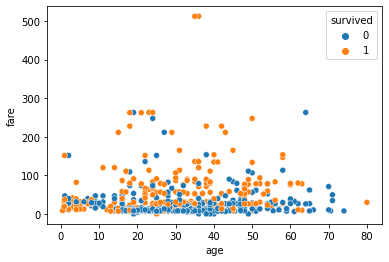

In [29]:
# Hypothesis I: correlation between Age with Fare. the higher Price they paid, the more chance to survive => False
sns.scatterplot(data = titanic, x='age', y='fare', hue='survived')
plt.show()

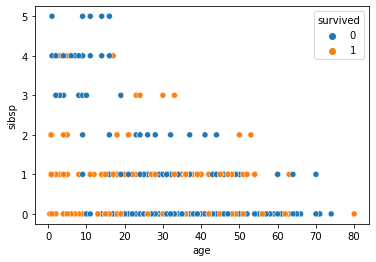

In [32]:
# Hypothesis II: Correlation between Age with sibsp
sns.scatterplot(data=titanic, x='age', y='sibsp', hue='survived')
plt.show()

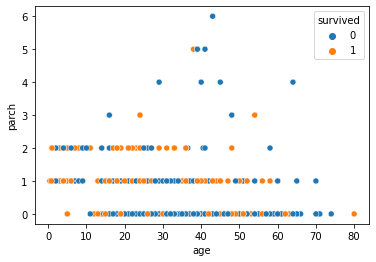

In [33]:
sns.scatterplot(data=titanic, x='age', y='parch', hue ='survived')
plt.show()

In [36]:
titanic['sibsp'].value_counts(), titanic['parch'].value_counts()

(0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: sibsp, dtype: int64,
 0    678
 1    118
 2     80
 3      5
 5      5
 4      4
 6      1
 Name: parch, dtype: int64)

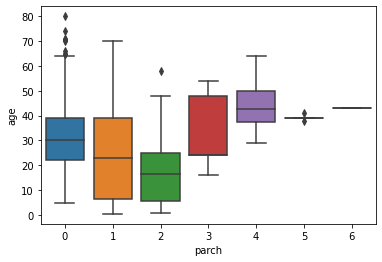

In [37]:
sns.boxplot(data=titanic, x= 'parch', y = 'age')
plt.show()

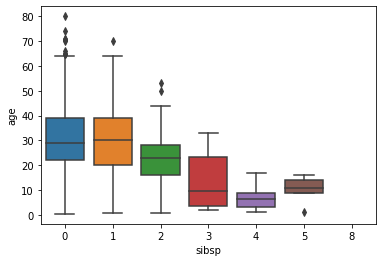

In [39]:
sns.boxplot(data=titanic, x= 'sibsp', y='age')
plt.show()

In [43]:
titanic.sex.unique()

array(['male', 'female'], dtype=object)

In [44]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [47]:
# độ tuổi trung bình của các cụm trọng cột who, sibpr, parch 
# vận dụng kiến thức chuyên môn để có thể điền vào các cụm dữ liệu domain expertize
# trong trường hợp này, có thể chia như sau.
# who | sibpr | parch | age.
# với giá trị who1, sibpr1, parch1 thì sẽ tính giá trị trung bình m1
# tương tự như thế n lần.
# gộp lại thành một bảng.
# một bảng mới sẽ gồm có với mỗi nhóm giá trị thì có độ tuổi trung bình là bao nhiêu.
# nếu như giá trị độ tuổi bị thất thoát, và nhóm giá trị who sibpr parch có trùng với nhóm của độ tuổi bị thất thoát, ta có thể điền giá trị trung bình vào.

In [48]:
titanic.groupby(['who', 'sibsp', 'parch']).age.mean()
#tìm giá trị trung bình độ tuổi dựa vào 'who', 'sibsp', 'parch'

who    sibsp  parch
child  0      0        12.166667
              1         6.052500
              2         4.981111
       1      0        13.900000
              1         4.566667
              2         5.274286
       2      1         2.300000
              2         9.000000
       3      1         4.333333
              2         6.250000
       4      1         5.625000
              2         6.125000
       5      2         8.750000
man    0      0        32.973597
              1        38.583333
              2        35.800000
       1      0        32.701923
              1        36.000000
              2        30.750000
              3        16.000000
              4        52.000000
              5        39.000000
       2      0        31.181818
              1        23.000000
       3      1              NaN
              2        19.000000
       4      1        16.000000
       8      2              NaN
woman  0      0        31.084211
              1        

In [53]:
# Ngoài ra ta có thể thêm vào một số cột như số lượng bản ghi, số % giá trị trống bằng cách sử dụng hàm lambda
titanic.groupby(['who','sibsp','parch']).age.agg([len,'mean', lambda x: (x.isnull().sum()/len(x)*100)])
#lệnh này sử dụng hàm lambda với x đại diện cho các giá trị who, sibsp và parch
#giá trị mean ở đây là giá trị tính theo từng cụm who sibsp, parch


len       mean  <lambda_0>
who   sibsp parch                              
child 0     0        6.0  12.166667    0.000000
            1        8.0   6.052500    0.000000
            2        9.0   4.981111    0.000000
      1     0        5.0  13.900000    0.000000
            1       15.0   4.566667    0.000000
            2        7.0   5.274286    0.000000
      2     1        5.0   2.300000    0.000000
            2        1.0   9.000000    0.000000
      3     1        3.0   4.333333    0.000000
            2        4.0   6.250000    0.000000
      4     1        8.0   5.625000    0.000000
            2        8.0   6.125000    0.000000
      5     2        4.0   8.750000    0.000000
man   0     0      410.0  32.973597   26.097561
            1       12.0  38.583333    0.000000
            2        5.0  35.800000    0.000000
      1     0       59.0  32.701923   11.864407
            1       21.0  36.000000    9.523810
            2        5.0  30.750000   20.000000
            3        1.0  16.000000    0.000000
            4        2.0  52.000000    0.000000
            5        1.0  39.000000    0.000000
      2     0       13.0  31.181818   15.384615
            1        1.0  23.000000    0.000000
      3     1        1.0        NaN  100.000000
            2        1.0  19.000000    0.000000
      4     1        1.0  16.000000    0.000000
      8     2        4.0        NaN  100.000000
woman 0     0      121.0  31.084211   21.487603
            1       18.0  34.176471    5.555556
            2       15.0  26.833333   20.000000
            3        1.0  24.000000    0.000000
            4        1.0  29.000000    0.000000
            5        2.0  40.000000    0.000000
      1     0       59.0  33.355556   23.728814
            1       21.0  35.450000    4.761905
            2        7.0  31.333333   14.285714
            3        2.0  51.000000    0.000000
            4        1.0  45.000000    0.000000
            5        2.0  38.500000    0.000000
            6        1.0  43.000000    0.000000
      2     0        3.0  35.500000   33.333333
            1        1.0  24.000000    0.000000
            2        3.0  20.000000    0.000000
            3        1.0  24.000000    0.000000
      3     0        2.0  31.500000    0.000000
            1        3.0        NaN  100.000000
            2        2.0  23.500000    0.000000
      4     2        1.0  17.000000    0.000000
      5     2        1.0  16.000000    0.000000
      8     2        3.0        NaN  100.000000

In [55]:
ser = titanic.groupby(['who','sibsp','parch']).age.apply(lambda x: x.fillna(x.mean()))
ser
# apply cho phép thực hiện hàm lambda dọc theo trục của DataFrame
# ý nghĩa là tạo Series 'ser' lưu trữ các giá trị cũ của 'age' và fillna bằng giá trị trung bình của tuổi dựa dựa theo 'who', 'sibsp', 'parch'

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [57]:
titanic['age'] = ser
#gán ser vào cột age trong bảng

In [58]:
#kiểm tra lại xem cột 'age' còn trống bao nhiêu thông tin nữa
titanic['age'].isnull().sum()

11

In [61]:
ser = titanic.groupby(['sibsp','parch']).age.apply(lambda x: x.fillna(x.mean()))
titanic['age'] = ser
titanic.age.isnull().sum()

7

In [69]:
#check lại thông tin giữa 'sibsp' ,'parch'
titanic.groupby(['sibsp', 'parch']).age.agg([len, 'mean', lambda x: x.isnull().sum()*100/len(x)])

len       mean  <lambda_0>
sibsp parch                              
0     0      537.0  32.315390         0.0
      1       38.0  29.647276         0.0
      2       29.0  21.597586         0.0
      3        1.0  24.000000         0.0
      4        1.0  29.000000         0.0
      5        2.0  40.000000         0.0
1     0      123.0  32.251148         0.0
      1       57.0  27.525439         0.0
      2       19.0  21.579123         0.0
      3        3.0  39.333333         0.0
      4        3.0  49.666667         0.0
      5        3.0  38.666667         0.0
      6        1.0  43.000000         0.0
2     0       16.0  31.991477         0.0
      1        7.0   8.357143         0.0
      2        4.0  17.250000         0.0
      3        1.0  24.000000         0.0
3     0        2.0  31.500000         0.0
      1        7.0   4.333333         0.0
      2        7.0  13.000000         0.0
4     1        9.0   6.777778         0.0
      2        9.0   7.333333         0.0
5     2        5.0  10.200000         0.0
8     2        7.0        NaN       100.0

ở trường hợp trên có 7 giá trị đang bị thất thoát là những người mà có đi cùng với 8 anh chị em và 2 người lớn.</br>
sác xuất ở đây 7 người này sẽ có khả năng là những người trẻ </br>
khá khó có thể tìm thấy 9 người trong cùng một gia đình đi trên cùng một chuyến tàu. --> xác suất thấp. </br>
nếu như mình coi đây là những người trẻ thì giá trị độ tuổi có thể gán cho 7 giá trị này là giá trị trung bình của những người trẻ tuổi. </br>

In [76]:
kid_avg_age = titanic[titanic['who']=='child'].age.mean()
#lọc theo cột who = child tính giá trị trung bình cột độ tuổi.

In [78]:
#fillna giá trị độ tuổi trung bình của child vào các giá trị na còn lại
titanic['age'] = titanic.age.fillna(kid_avg_age)

In [79]:
# kiểm tra lại giá trị trống
titanic['age'].isnull().sum()

0

## Xử lý thông tin cột Embarked

In [80]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [81]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [84]:
titanic['embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [86]:
titanic[titanic['embarked'].isnull()] #lọc ra những dòng có embarked = null

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [93]:
#lọc người có giới tính nữ, sống sót, thương gia, xem họ xuất phát từ cảng nào. và nếu cảng nào có giá trị xuất hiện nhiều nhất thì điền giá trị đó vào giá trị trống này.

#cách1
filter1 = (titanic['survived']==1)
filter2 = (titanic['pclass']==1)
filter3 = (titanic['sex']=='female')
filter4 = (titanic['sibsp']==0)
filter5 = (titanic['parch']==0)

titanic[filter1 & filter2 & filter3 & filter4 & filter5]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
11,1,1,female,58.000000,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
61,1,1,female,38.000000,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
194,1,1,female,44.000000,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True
195,1,1,female,58.000000,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
218,1,1,female,32.000000,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True
256,1,1,female,31.084211,0,0,79.2000,C,First,woman,False,NaN,Cherbourg,yes,True
257,1,1,female,30.000000,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True
258,1,1,female,35.000000,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
269,1,1,female,35.000000,0,0,135.6333,S,First,woman,False,C,Southampton,yes,True
290,1,1,female,26.000000,0,0,78.8500,S,First,woman,False,NaN,Southampton,yes,True


In [96]:
# cách 2 dùng hàm query
ser = titanic.query("survived == 1 and pclass ==1 and sex == 'female' and sibsp ==0  and parch==0")
ser

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
11,1,1,female,58.000000,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
61,1,1,female,38.000000,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
194,1,1,female,44.000000,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True
195,1,1,female,58.000000,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
218,1,1,female,32.000000,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True
256,1,1,female,31.084211,0,0,79.2000,C,First,woman,False,NaN,Cherbourg,yes,True
257,1,1,female,30.000000,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True
258,1,1,female,35.000000,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
269,1,1,female,35.000000,0,0,135.6333,S,First,woman,False,C,Southampton,yes,True
290,1,1,female,26.000000,0,0,78.8500,S,First,woman,False,NaN,Southampton,yes,True


In [110]:
ser['embarked'].value_counts().idxmax()
#có thể dùng mode để tính giá trị nhiều nhất 
# ser['embarked'].mode()

'C'

In [111]:
titanic['embarked'] = titanic['embarked'].fillna('C')

In [112]:
titanic['embarked'].isna().sum()

0

In [113]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Xử lý thông tin cột Deck

xử lý mất mát với dữ liệu có 2 cách
